In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit 
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import recall_score
from scipy import stats
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve,accuracy_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [3]:
data=pd.read_csv("final2.csv")
data.sold.value_counts()

No     44072
Yes    18591
Name: sold, dtype: int64

In [4]:
data=pd.read_csv("final2.csv")
data.drop(columns=data.columns[data.isna().any()].tolist(),inplace=True)
data.drop(columns=['id_val','date'],inplace=True)
data['model']=data["brand"]+"_"+data["model"]
data.drop(columns="brand",inplace=True)

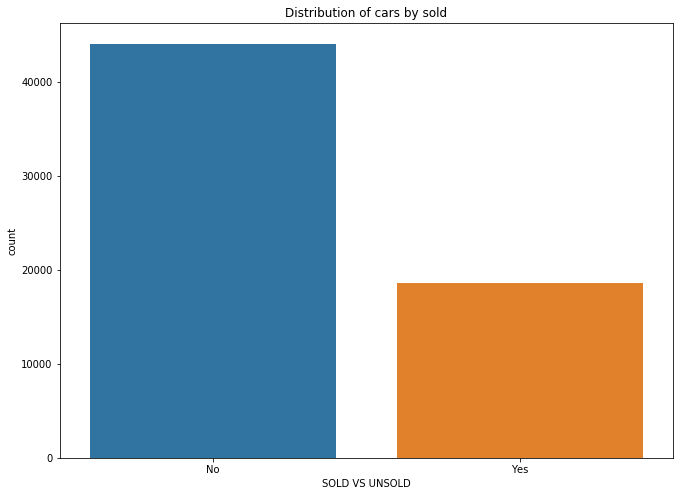

No     70.331775
Yes    29.668225
Name: sold, dtype: float64


In [6]:
plt.figure(figsize=(11, 8))
sns.countplot(x="sold",data=data)
plt.title("Distribution of cars by sold")
plt.xlabel("SOLD VS UNSOLD")
plt.show()
#let's see percenatage of customers who didn't subscribe to term deposit,
#and percenatage of customers who subscribed to term deposit
print(data.sold.value_counts()/len(data)*100)

#### <p1>as we see our benchmark is about 84 percent our model should predict more precisely</p1>

df_num=data.select_dtypes(exclude="object")## we divide data in this groups to check variance, 
df_object=data.select_dtypes(include="object")

In [42]:
### lets create dummies from object variables and final data
df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=True)
data3=df_num.join(df_dummies)##corrected dataframe is different from corrected1 it include correleted variables
Y3=data3.sold_Yes
X3=data3.drop("sold_Yes",axis=1)
grid3=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(50,83,3),
                         "min_samples_leaf":range(40,60,5),
                         },scoring="roc_auc",cv=5,n_jobs=-1).fit(X3,Y3)
params=list(grid3.best_params_.values())
depth,leafs=params
x_train,x_test,y_train,y_test=train_test_split(X3,Y3,test_size=0.2,random_state=42,stratify=Y3)
#tree=DecisionTreeClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs).fit(x_train,y_train)
train_score=grid3.score(x_train,y_train)
test_score=grid3.score(x_test,y_test)
print(grid3.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(DecisionTreeClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs),X3,Y3,cv=5))))
y_pred=grid3.predict(x_test)
y_pred2=grid3.predict(x_train)
print(classification_report(y_test,grid3.predict(x_test)))
print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
print("average Roc_score is",grid3.best_score_)
print("recall for train",recall_score(y_train,y_pred2))
print("recall for test",recall_score(y_test,y_pred))

{'max_depth': 50, 'min_samples_leaf': 50}
Train score is 0.7202835736075951 and Test score is0.7163686982767221
cross_validation score is 0.5901723238963499
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      8815
           1       0.44      0.68      0.53      3718

   micro avg       0.65      0.65      0.65     12533
   macro avg       0.63      0.66      0.63     12533
weighted avg       0.71      0.65      0.66     12533

roc_auc: for test is 0.6575404655556494
roc_auc: for train is 0.6598993782647302
average Roc_score is 0.6195996014708542
recall for train 0.68520137161299
recall for test 0.6761699838622915


{'max_depth': 50, 'min_samples_leaf': 50}
cross_validation score is 0.5901723238963499


<strong> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLASSIFICATION REPORT</strong>

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      8815
           1       0.44      0.68      0.53      3718

   micro avg       0.65      0.65      0.65     12533
   macro avg       0.63      0.66      0.63     12533
weighted avg       0.71      0.65      0.66     12533

Overall Accuracy score is  0.649964094789755


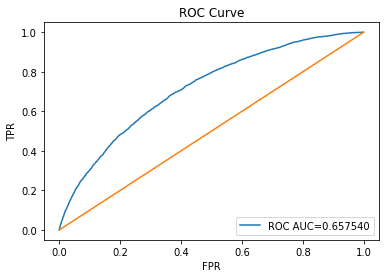

In [30]:
#ROC curve
x_train,x_test,y_train,y_test=train_test_split(X3,Y3,test_size=0.2,random_state=42,stratify=Y3)
#tree=DecisionTreeClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs).fit(x_train,y_train)
train_score=grid3.score(x_train,y_train)
test_score=grid3.score(x_test,y_test)
print(grid3.best_params_)
print("cross_validation score is %s"% (np.mean(cross_val_score(DecisionTreeClassifier(random_state=42,class_weight="balanced",max_depth=depth,min_samples_leaf=leafs),X3,Y3,cv=5))))
display(Markdown("<strong> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLASSIFICATION REPORT</strong>" ))

y_pred=grid3.predict(x_test)
y_pred2=grid3.predict(x_train)
print(classification_report(y_test,grid3.predict(x_test)))

print("Overall Accuracy score is ",accuracy_score(y_test,y_pred))
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,grid3.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.title("ROC Curve")
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [43]:
from joblib import dump, load
dump(grid3, 'tree.joblib') 
clf = load('tree.joblib')

In [44]:
import pickle
with open('mylist', 'wb') as f:
    pickle.dump(X3.columns, f)

In [45]:
def predict(new):
    from joblib import dump, load
    clf = load('tree.joblib')
    import pickle
    with open("mylist", "rb") as fp:   # Unpickling
        b = pickle.load(fp)
    #new=data[:1]
    #new.drop(columns="sold",inplace=True)
    new['model']=new["brand"]+"_"+new["model"]
    new.drop(columns="brand",inplace=True)
    df_num=new.select_dtypes(exclude="object")## we divide data in this groups to check variance, 
    df_object=new.select_dtypes(include="object")
    #print(df_object)
    ## lets create dummies from object variables and final data
    df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=False)
    new=df_num.join(df_dummies)
    for i in b:
        if i not in new.columns:
            new[i]=0
    for i in new.columns:
        if i not in b:
            del new[i]
    class_,probability= clf.predict(new)[0],clf.predict_proba(new)[0][1]
    if class_==0:
        class_="unsold"
    else:
        class_="sold"
    
    print("The probability of the car to be sold is {}, so it is predicted as {}. ".format(probability,class_) )
    return class_,probability
   

In [49]:
import pandas as pd
data=pd.read_csv("final2.csv")
z=data[1:2].copy()
z["price"]=2500
predict(z)

The probability of the car to be sold is 0.5140102384754814, so it is predicted as sold. 


('sold', 0.5140102384754814)

In [47]:
data

,brand,date,id_val,model,price,year,Color,Body_Style,Horsepower,Hand_Drive,Engine_Cylinders,Engine,Engine_Volume,Interior_Color,Mileage,Gearbox,Drive_train,sold
0,Opel,8/2/2018,ID: 1770041,Astra,3000.0,2003,black,Hatchback,NaN,Left,NaN,Petrol,NaN,NaN,140000.0,Mechanical,NaN,No
1,Toyota,8/2/2018,ID: 1769874,Camry,10000.0,2012,black,Sedan,NaN,Left,NaN,Petrol,NaN,NaN,102000.0,Automatic,NaN,Yes
2,Nissan,8/2/2018,ID: 1769860,Elgrand,7500.0,2006,White,Minivan / Minibus,NaN,Right,NaN,Petrol,NaN,NaN,75000.0,Automatic,NaN,Yes
3,Mitsubishi,8/2/2018,ID: 1770897,Pajero,8500.0,2007,black,Truck:,NaN,Left,NaN,Astragalus,NaN,NaN,136000.0,Automatic,NaN,Yes
4,Mazda,8/2/2018,ID: 1770715,6,12500.0,2015,Grey,Sedan,NaN,Left,NaN,Petrol,NaN,NaN,89000.0,Automatic,NaN,Yes
5,Toyota,8/2/2018,ID: 1769921,Camry,8800.0,2010,black,Sedan,181.0,Left,4.0,Petrol,2.5,Grey,88000.0,Automatic,Front,Yes
6,Mazda,8/2/2018,ID: 1769876,CX9,9000.0,2009,black,Truck:,NaN,Left,NaN,Petrol,NaN,NaN,100000.0,Automatic,NaN,No
7,Toyota,8/2/2018,ID: 1770312,Camry,15000.0,2015,black,Sedan,NaN,Left,4.0,Petrol,2.5,black,47000.0,Automatic,Front,No
8,BMW,8/2/2018,ID: 1770022,318,4000.0,2001,Silver,Sedan,118.0,Left,6.0,Petrol,1.9,black,190000.0,Mechanical,Rear,Yes
9,Opel,8/2/2018,ID: 1770238,Zafira,4300.0,2004,Blue,Minivan / Minibus,NaN,Left,NaN,Diesel,NaN,NaN,260000.0,Mechanical,NaN,No


In [11]:
new["brand"]+"_"+new["model"]

0                          Opel_Astra 
1                        Toyota_Camry 
2                      Nissan_Elgrand 
3                   Mitsubishi_Pajero 
4                              Mazda_6
5                        Toyota_Camry 
6                           Mazda_CX9 
7                        Toyota_Camry 
8                              BMW_318
9                         Opel_Zafira 
10                         Opel_Astra 
11                             BMW_X5 
12                             BMW_323
13                Mercedes-Benz_A 170 
14                Mercedes-Benz_C 240 
15                     Nissan_X-Trail 
16                Mercedes-Benz_E 350 
17                Mercedes-Benz_C 200 
18                         Opel_Astra 
19                       Nissan_Teana 
20                     Hyundai_Sonata 
21                       Lexus_ES 350 
22                        Opel_Zafira 
23                Mercedes-Benz_E 320 
24                             BMW_528
25                       

In [71]:
from joblib import dump, load
clf = load('tree.joblib')
import pickle
with open("mylist", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
#new=data[:1]
#new.drop(columns="sold",inplace=True)
df_num=new.select_dtypes(exclude="object")## we divide data in this groups to check variance, 
df_object=new.select_dtypes(include="object")
#print(df_object)
## lets create dummies from object variables and final data
df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=False)
new=df_num.join(df_dummies)
for i in b:
    if i not in new.columns:
        new[i]=0
for i in new.columns:
    if i not in b:
        del new[i]

,brand,model,price,year,Color,Body_Style,Hand_Drive,Engine,Mileage,Gearbox,sold
1,Toyota,Camry,10000.0,2012,black,Sedan,Left,Petrol,102000.0,Automatic,Yes


In [18]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


printmd("**bold text**")

**bold text**